# Pymaceuticals Inc.
---

### Analysis

Considering the statistical scores from the results of the tests for the different treatments (drugs), the ones that show strongest potential based on their mean and median scores are Ramicane, Capomulin, Propriva, Ceftamin, and Infubinol.  That said, Propriva shows a larger var, std, and sem than Ceftamin and Infubinol, which would mean that the results are quite disperse and, hence, less reliable.  For this reason, the top four could be Ramicane, Capomulin, Ceftamin, and Infubinol.  Another reason to disqualify Propriva is that is shows the lowest level of observations (Timepoints). 
When analyzing Capomulin, from subject l509, it seems like the treatment had was more successful after day 20.  
Also, it seems like the weight of the subject needs to be considered as a driver of success as there is a strong correlation between mouse weight and the volume of the tumor.


In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_study_results_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_data_study_results_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [92]:
# Checking the number of mice. #count the unique codes for the mice in the "Mouse ID" column
number_of_mice = mouse_data_study_results_df["Mouse ID"].nunique()
number_of_mice

249

In [93]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_time = mouse_data_study_results_df.groupby(['Mouse ID', 'Timepoint']).filter(lambda x: len(x) > 1)['Mouse ID'].unique()  #using a labda funtion: https://www.w3schools.com/python/python_lambda.asp
duplicate_mice_time

array(['g989'], dtype=object)

In [94]:
# Optional: Get all the data for the duplicate mouse ID. 
#assign a value for the mouse id
duplicated_mouse_id = 'g989'
#filter the rows with the duplicated mouse id
rows_with_duplicated_mouse_id = mouse_data_study_results_df[mouse_data_study_results_df['Mouse ID'] == duplicated_mouse_id]
rows_with_duplicated_mouse_id

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [95]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df = mouse_data_study_results_df.drop(mouse_data_study_results_df[mouse_data_study_results_df['Mouse ID'] == 'g989'].index)
cleaned_mouse_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [96]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = cleaned_mouse_df['Mouse ID'].nunique()
number_of_mice_clean

248

## Summary Statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_df = cleaned_mouse_df.groupby('Drug Regimen')
# need an empty dictionary to store the statistical values
stats_dict = {}
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
for regimen, data in drug_regimen_df:
    mean = data['Tumor Volume (mm3)'].mean()
    median = data['Tumor Volume (mm3)'].median()
    variance = data['Tumor Volume (mm3)'].var()
    std_dev = data['Tumor Volume (mm3)'].std()
    sem = data['Tumor Volume (mm3)'].sem()
    
    stats_dict[regimen] = {
        'Mean Tumor Volume': mean,
        'Median Tumor Volume': median,
        'Tumor Volume Variance': variance,
        'Tumor Volume Std. Dev.': std_dev,
        'Tumor Volume Std. Err.': sem
    }
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_stats_df = pd.DataFrame(stats_dict)
drug_regimen_stats_df = drug_regimen_stats_df.T #transpose function used to show data as requested in challenge: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html
drug_regimen_stats_df

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Capomulin          40.675741            41.557809              24.947764   
Ceftamin           52.591172            51.776157              39.290177   
Infubinol          52.884795            51.820584              43.128684   
Ketapril           55.235638            53.698743              68.553577   
Naftisol           54.331565            52.509285              66.173479   
Placebo            54.033581            52.288934              61.168083   
Propriva           52.320930            50.446266              43.852013   
Ramicane           40.216745            40.673236              23.486704   
Stelasyn           54.233149            52.431737              59.450562   
Zoniferol          53.236507            51.818479              48.533355   

           Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Capomulin                4.994774                0.329346  
Ceftamin                 6.268188                0.469821  
Infubinol                6.567243                0.492236  
Ketapril                 8.279709                0.603860  
Naftisol                 8.134708                0.596466  
Placebo                  7.821003                0.581331  
Propriva                 6.622085                0.544332  
Ramicane                 4.846308                0.320955  
Stelasyn                 7.710419                0.573111  
Zoniferol                6.966589                0.516398

In [98]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_stats_v2_df = cleaned_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])  #using the agg method: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
drug_regimen_stats_v2_df

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

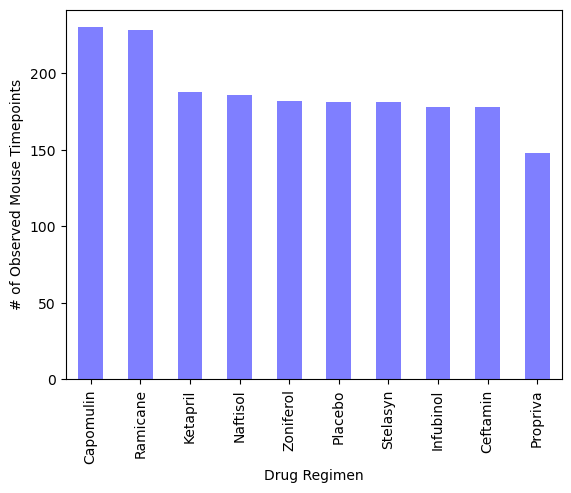

In [99]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_regimens_df = cleaned_mouse_df['Drug Regimen'].value_counts()

# bar plot using pandas
count_regimens_df.plot(kind='bar', color='blue', alpha=0.5)

# Set the labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# show graphic
plt.show()

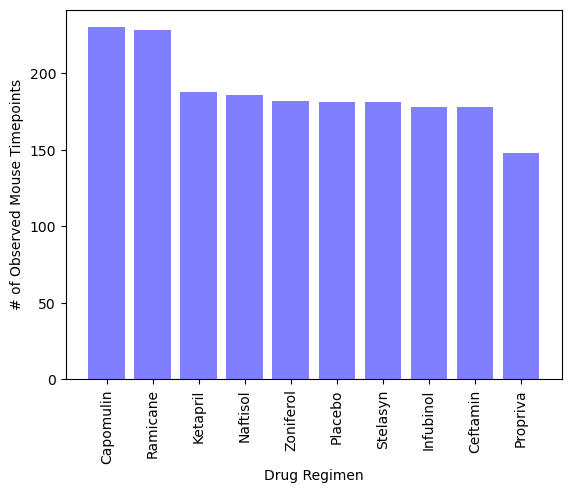

In [100]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_regimens_df = cleaned_mouse_df['Drug Regimen'].value_counts()

# drug regimens and counts
drug_regimens_types = count_regimens_df.index
drug_regimens_counts = count_regimens_df.values

# x-axis tick positions
x_axis = np.arange(len(drug_regimens_types))

# Create bar plot
plt.bar(x_axis, drug_regimens_counts, color='blue', alpha=0.5)

# Set the x-axis labels
plt.xticks(x_axis, drug_regimens_types, rotation='vertical')

# labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# show graphic
plt.show()

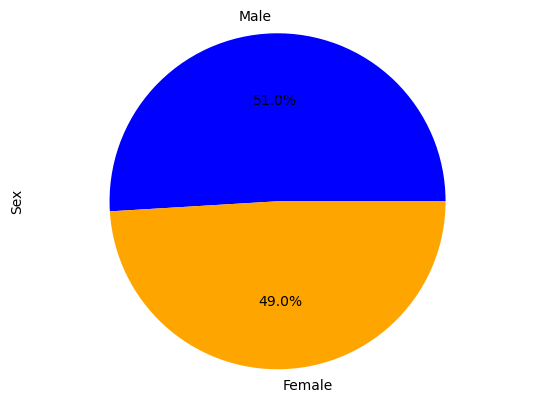

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_proportions = cleaned_mouse_df['Sex'].value_counts()

#pie plot code
gender_proportions.plot(kind='pie', colors=['blue', 'orange'], autopct='%1.1f%%')

# show graphic
plt.axis('equal')
plt.show()

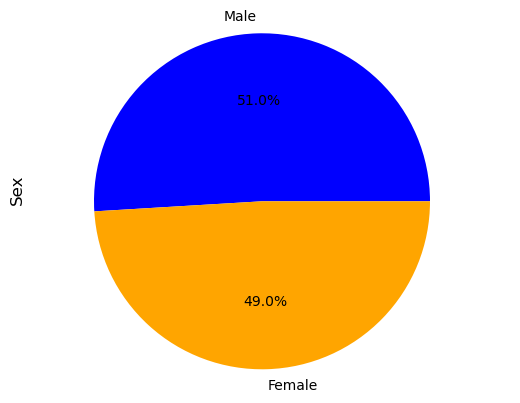

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_proportions = cleaned_mouse_df['Sex'].value_counts()

# Create the pie plot using pyplot
plt.pie(gender_distribution, labels=gender_proportions.index, colors=['blue', 'orange'], autopct='%1.1f%%')

#label 'Sex'
plt.text(-1.5, 0, 'Sex', fontsize=12, rotation='vertical')

# Display the plot
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [132]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = cleaned_mouse_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_tumor_volume_df = pd.merge(cleaned_mouse_df, greatest_timepoint, on=['Mouse ID', 'Timepoint'])
greatest_tumor_volume_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       k403     Ramicane    Male          21          16         45   
1       s185    Capomulin  Female           3          17         45   
2       x401    Capomulin  Female          16          15         45   
3       m601    Capomulin    Male          22          17         45   
4       g791     Ramicane    Male          11          16         45   
..       ...          ...     ...         ...         ...        ...   
243     z314     Stelasyn  Female          21          28          5   
244     z435     Propriva  Female          12          26         10   
245     z581    Infubinol  Female          24          25         45   
246     z795     Naftisol  Female          13          29         45   
247     z969     Naftisol    Male           9          30         45   

     Tumor Volume (mm3)  Metastatic Sites  
0             22.050126                 1  
1             23.343598                 1  
2             28.484033                 0  
3             28.430964                 1  
4             29.128472                 1  
..                  ...               ...  
243           45.934712                 0  
244           48.710661                 0  
245           62.754451                 3  
246           65.741070                 3  
247           73.867845                 4  

[248 rows x 8 columns]

In [135]:
# define the drugs to analyze
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Put treatments into a list for for loop (and later for plot labels)
for drug in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = greatest_tumor_volume_df.loc[greatest_tumor_volume_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Add the tumor volumes to the list
    tumor_vol_data.append(tumor_volumes)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartile_boundaries = tumor_volumes.quantile([0.25, 0.5, 0.75])
    bottom_quartile = quartile_boundaries[0.25]
    top_quartile = quartile_boundaries[0.75]
    iqr = top_quartile - bottom_quartile

    
    # Determine outliers using upper and lower bounds
    bottom_bound = bottom_quartile - 1.5 * iqr
    top_bound = top_quartile + 1.5 * iqr
    outlier_points = tumor_volumes[(tumor_volumes < bottom_bound) | (tumor_volumes > top_bound)]
    
    # Print the results
    print(f"{drug}'s potential outlier points: {outlier_points}")

Capomulin's potential outlier points: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outlier points: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outlier points: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outlier points: Series([], Name: Tumor Volume (mm3), dtype: float64)


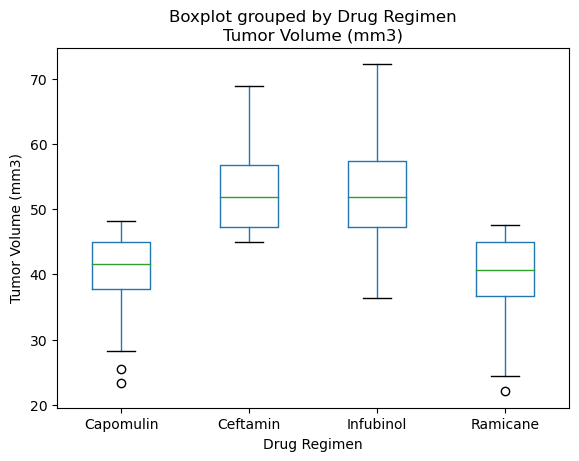

In [105]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# use only the specified drugs
drugs_df = cleaned_mouse_df[cleaned_mouse_df['Drug Regimen'].isin(drugs)]

# box plot
drugs_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False)

# Set the labels
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# graphic
plt.show()

## Line and Scatter Plots

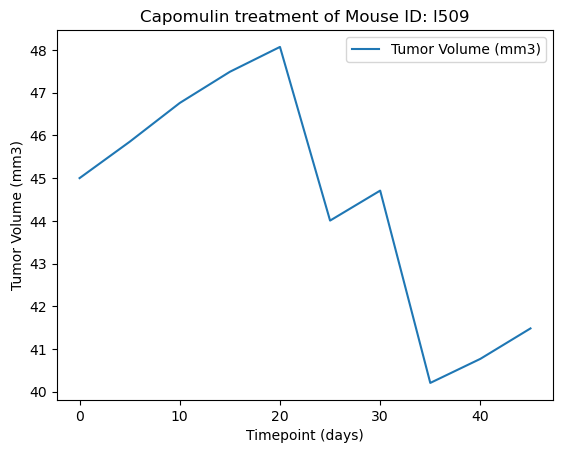

In [111]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# mice treated with Capomulin
capomulin = cleaned_mouse_df[cleaned_mouse_df['Drug Regimen'] == 'Capomulin']

# input a mouse ID
mouse_id = 'l509'

# data the selected mouse ID
mouse_ID_data = capomulin[capomulin['Mouse ID'] == mouse_id]

# Plot tumor volume vs. time in days
mouse_ID_data.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line')

# labels
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of Mouse ID: {mouse_id}')

# Display the plot
plt.show()


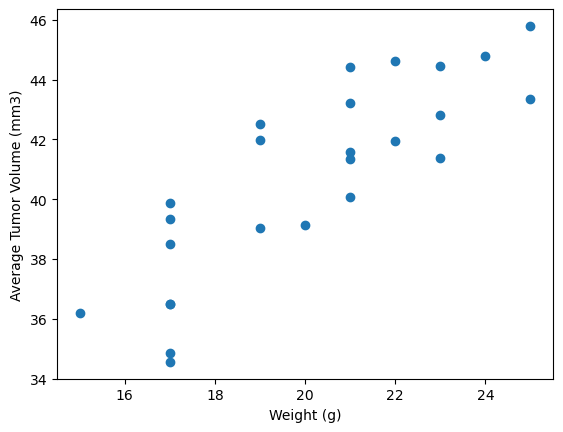

In [113]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# average tumor volume for each mouse
avg_tumor_volume = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# combine the avg. tumor volume with mouse weight
mouse_weight = capomulin.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot
plt.scatter(mouse_weight, avg_tumor_volume)

# Set the labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


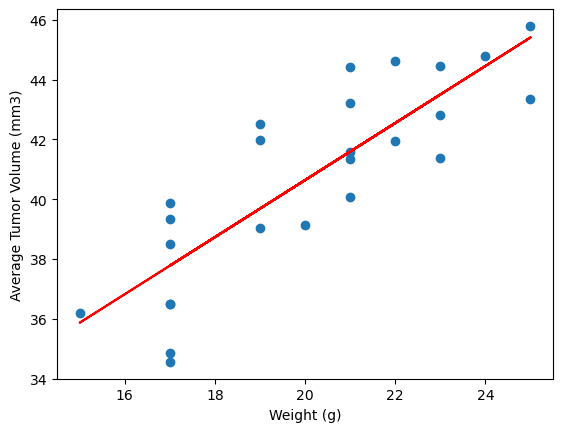

In [121]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation, _ = st.pearsonr(mouse_weight, avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")
slope, intercept, _, _, _ = st.linregress(mouse_weight, avg_tumor_volume)

# scatter plot
plt.scatter(mouse_weight, avg_tumor_volume)

# Add the regression line
regression_line = slope * mouse_weight + intercept
plt.plot(mouse_weight, regression_line, color='red')

# Set the labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()
